In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings



In [38]:
dt_clf=DecisionTreeClassifier(random_state=156)
#dt_clf=DecisionTreeClassifier(random_state=156 max_depth=3)




In [39]:
iris_data=load_iris()
X_train, X_test, y_train, y_test =train_test_split(iris_data.data, iris_data.target,test_size=0.2, random_state=11)


dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=156)

In [50]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot",class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

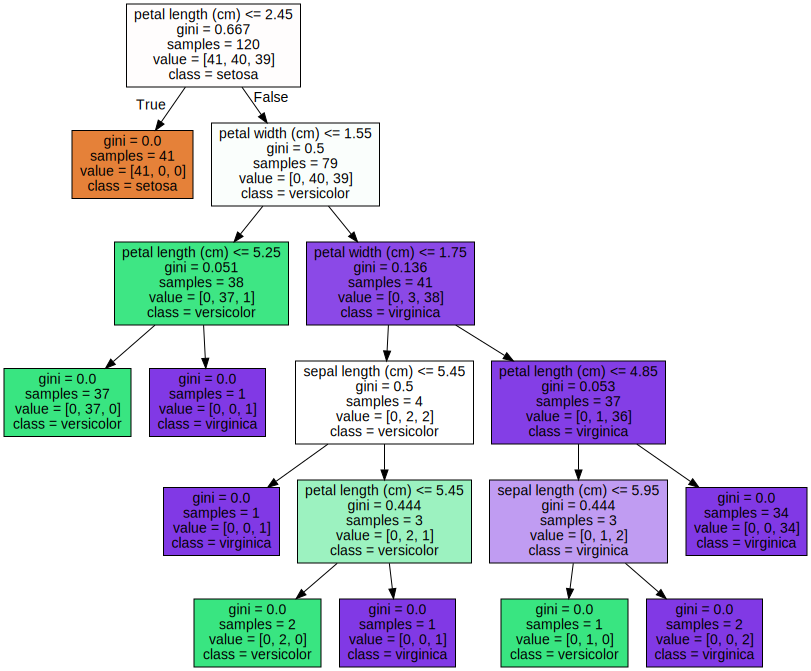

In [41]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()

graphviz.Source(dot_graph)

In [42]:
dt_clf.feature_importances_

array([0.02500521, 0.        , 0.55490281, 0.42009198])

In [43]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [44]:
#feature importance 추출
print("Feature importances:\n {0}".format(np.round(dt_clf.feature_importances_,3)))

Feature importances:
 [0.025 0.    0.555 0.42 ]


In [45]:
#feature별 importance 매핑
for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))

sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

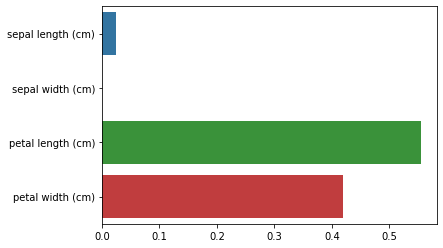

In [46]:
#feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

In [51]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

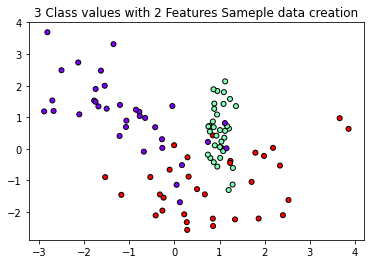

In [71]:
plt.title('3 Class values with 2 Features Sameple data creation')

X_features , y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,n_classes=3, n_clusters_per_class=1, random_state=0)
#2차원 시각화를 위해서  feature는 2개, 결정값 클래스는 3가지 유형의  classification 샘플 데이터 생성

plt.scatter(X_feature[:,0],X_feature[:,1], marker='o' , c=y_labels, s=25 ,cmap='rainbow',edgecolors='k')

In [74]:
import numpy as np


def visualize_boundary(model,X,y):
    fig,ax=plt.subplots()
    ax.scatter(X[:,0],X[:,1],c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(),y.max()),zorder=3)
        
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end =ax.get_xlim()
    ylim_start, ylim_end= ax.get_ylim()
    model.fit(X,y)
    
    xx,yy=np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end,num=200))
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    n_classes=len(np.unique(y))
    contours =ax.contourf(xx,yy,Z,alpha=0.3,
                          levels=np.arange(n_classes+1)-0.5,
                          cmap='rainbow',clim=(y.min(),y.max()),
                          zorder=1)

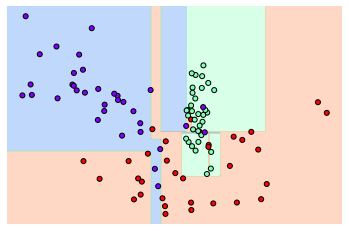

In [75]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

In [ ]:
#랜덤포레스트는 랜덤하게 숲을 만드는 전체 데이터를 부트스트랩(복원추출) 결과를 보고 판단 
